# New York City Taxi Fare Prediction

Training a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

Dataset link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview

In [7]:
import opendatasets as od
import os
import pandas as pd

In [8]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [9]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in ".\new-york-city-taxi-fare-prediction" (use force=True to force download)
Wall time: 1.01 ms


In [10]:
os.listdir('new-york-city-taxi-fare-prediction')

['GCP-Coupons-Instructions.rtf',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

In [42]:
data_dir = './new-york-city-taxi-fare-prediction'

In [1]:

# List of files with size
!ls -lh {data_dir}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [123]:
%%time
import random
data_dir = './new-york-city-taxi-fare-prediction'
sample_frac = 0.01

selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'uint8'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

Wall time: 1min 39s


In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1


### Load Test Set

In [13]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [14]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Outlier Removal

### Training Set

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), uint8(1)
memory usage: 17.4 MB


In [19]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354463,-72.288383,39.830513,-72.295395,39.934257,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


(0.0, 5.0)

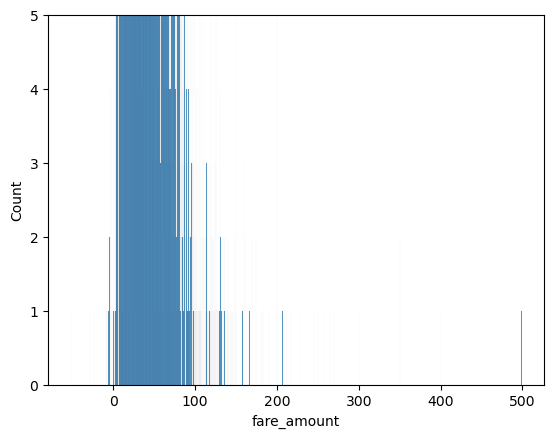

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.histplot(data=df, x="fare_amount")
plt.ylim(0, 5)

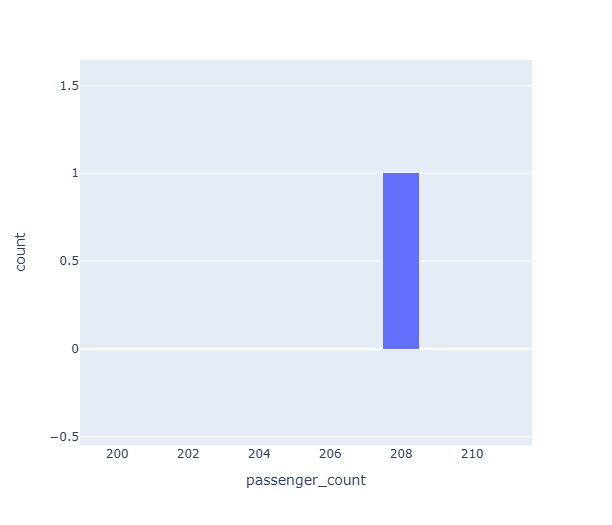

In [45]:
from IPython.display import Image, display

display(Image(filename="newplot (1).png"))

In [134]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0 -> only one row is having fair 499
- `passenger_count` ranges from 0 to 208 -> only one row is having passenger count 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

### Test Set

In [46]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [47]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(3), float64(1), object(1), uint8(1)
memory usage: 358.3+ KB


In [49]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [135]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

### Removing Outliers in Training data -> using 5 std

In [124]:
df[df.fare_amount<df.fare_amount.mean()*5].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,547331.000000,547331.000000,547331.000000,547331.000000,547331.000000,547331.000000
mean,10.851467,-72.309090,39.847744,-72.318367,39.942541,1.684631
std,8.118234,11.605299,6.846934,12.009181,9.261579,1.337958
min,-52.000000,-1183.362793,-2073.150635,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992073,40.735161,-73.991402,40.734229,1.000000
50%,8.500000,-73.981888,40.752750,-73.980202,40.753217,1.000000
75%,12.500000,-73.967430,40.767136,-73.963905,40.768128,2.000000
max,56.700001,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [125]:
P_long_5std=df.pickup_longitude.mean()-(5*df.pickup_longitude.std())
P_lat_5std=df.pickup_latitude.mean()+(5*df.pickup_latitude.std())
D_long_5std=df.dropoff_longitude.mean()-(5*df.dropoff_longitude.std())
D_lat_5std=df.dropoff_latitude.mean()+(5*df.dropoff_latitude.std())
PC_5std=df.passenger_count.mean()+(5*df.passenger_count.std())

In [126]:
P_long_5std,P_lat_5std,D_long_5std,D_lat_5std,PC_5std

(-130.39855861663818,
 80.03632545471191,
 -132.62131309509277,
 86.20954499446401,
 8.373304873316611)

In [131]:
df=df[(df.pickup_longitude > P_long_5std) &(df.pickup_longitude < -1*P_long_5std)&
   (df.pickup_latitude < P_lat_5std)&(df.pickup_latitude > -1*P_lat_5std)&
  (df.dropoff_longitude>D_long_5std) &(df.dropoff_longitude<-1*D_long_5std)&
   (df.dropoff_latitude < D_lat_5std) &(df.dropoff_latitude > -1*D_lat_5std)&
  (df.passenger_count<PC_5std)& (df.fare_amount <250)]
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552417.000000,552417.000000,552417.000000,552417.000000,552417.000000,552417.000000
mean,11.349031,-72.291817,39.839348,-72.291130,39.919052,1.684610
std,9.722402,10.458069,6.081780,10.458994,6.088958,1.308542
min,-52.000000,-98.449997,-74.015877,-84.636475,-74.036425,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967163,40.767036,-73.963737,40.768060,2.000000
max,245.000000,40.805866,48.500000,54.658901,74.013003,6.000000


In [132]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [139]:
len(train_df), len(val_df)

(441933, 110484)

### Fill/Remove Missing Values

In [140]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [141]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [142]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [143]:
target_col = 'fare_amount'

##### Training

In [145]:
train_inputs = train_df[input_cols]

In [146]:
train_targets = train_df[target_col]

In [147]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
108727,-74.003548,40.712139,-73.993225,40.713855,1
167507,-74.000511,40.732246,-73.990906,40.744402,1
27344,-73.975670,40.782063,-73.978851,40.757328,1
141185,-74.001930,40.750702,-73.993782,40.758872,1
257614,-73.976074,40.744377,-73.968452,40.757092,1
...,...,...,...,...,...
110271,-73.984039,40.754414,-73.984039,40.754413,3
259187,-73.987778,40.756889,-73.999542,40.761781,3
365858,-73.966499,40.764481,-73.990761,40.745418,1
131935,-73.999458,40.728519,-73.981300,40.724979,1


In [148]:
train_targets

108727     6.9
167507     5.5
27344      7.3
141185     6.5
257614     8.0
          ... 
110271     8.1
259187     4.5
365858    11.5
131935     6.9
121961     9.7
Name: fare_amount, Length: 441933, dtype: float32

##### Validation

In [149]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
506630,-73.978760,40.745052,-73.966362,40.761884,1
70227,-73.987259,40.765244,-73.987259,40.765245,2
517572,-73.950806,40.786209,-73.961967,40.805350,1
444785,-73.956322,40.767975,-73.981560,40.780964,1
176271,-73.992165,40.750027,-73.984367,40.754967,1
...,...,...,...,...,...
449338,0.000000,0.000000,0.000000,0.000000,1
414133,-73.961418,40.760487,-73.960541,40.775465,6
216216,-73.964172,40.760998,-73.971115,40.748375,1
106813,-73.987938,40.743942,-73.973183,40.752505,5


In [150]:
val_targets

506630     5.3
70227      7.7
517572     9.5
444785    10.1
176271     6.1
          ... 
449338     6.5
414133     8.0
216216     4.5
106813     7.3
243223     4.9
Name: fare_amount, Length: 110484, dtype: float32

##### Test

In [151]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746139,1
3,-73.981163,40.767807,-73.990448,40.751635,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [153]:
import numpy as np

In [154]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [155]:
mean_model = MeanRegressor()

In [156]:
mean_model.fit(train_inputs, train_targets)

In [157]:
mean_model.mean

11.354974746704102

In [160]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.35497475, 11.35497475, 11.35497475, ..., 11.35497475,
       11.35497475, 11.35497475])

In [162]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.35497475, 11.35497475, 11.35497475, ..., 11.35497475,
       11.35497475, 11.35497475])

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [165]:
train_rmse

9.72818921100289

In [166]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [167]:
val_rmse

9.703583984188564

Our dumb hard-coded model is off by \$9.72 on average, which is pretty bad considering the average fare is \$11.32.

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
linreg_model = LinearRegression()

In [170]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [171]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.2714449 , 11.27075241, 11.27461322, ..., 11.27472902,
       11.27179749, 11.27451469])

In [172]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.2706371 , 11.37159947, 11.27160308, ..., 11.27377572,
       11.66830066, 11.27322504])

In [173]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



9.726570070527467

In [174]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



9.702362147630287

The linear regression model is off by $9.702, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [176]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746139,1
3,-73.981163,40.767807,-73.990448,40.751635,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [177]:
test_preds = linreg_model.predict(test_inputs)

In [178]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [179]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [180]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [181]:
generate_submission(test_preds, 'linreg_submission.csv')

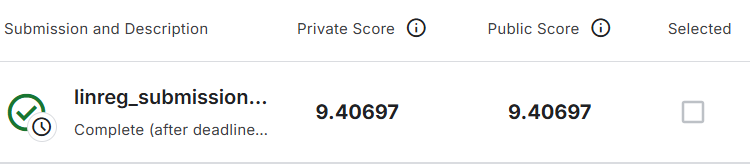

In [182]:
display(Image(filename="Screenshot 2024-11-11 103352.png"))

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks


### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [183]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [184]:
add_dateparts(train_df, 'pickup_datetime')

In [185]:
add_dateparts(val_df, 'pickup_datetime')

In [186]:
add_dateparts(test_df, 'pickup_datetime')

In [188]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [189]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [190]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [191]:
%%time
add_trip_distance(train_df)

Wall time: 223 ms


In [192]:
add_trip_distance(val_df)

In [193]:
add_trip_distance(test_df)

In [194]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
531949,15.000000,2013-07-15 22:00:04+00:00,-74.010468,40.707733,-73.993362,40.754667,1,2013,7,15,0,22,5.410914
2562,13.700000,2011-10-29 22:00:00+00:00,-73.999443,40.728245,-73.967560,40.678362,1,2011,10,29,5,22,6.159599
356729,9.000000,2014-09-05 01:13:13+00:00,-73.988037,40.744328,-74.005424,40.723041,2,2014,9,5,4,1,2.781524
423551,42.099998,2012-08-27 06:07:00+00:00,-73.781815,40.645000,-73.979515,40.643347,2,2012,8,27,0,6,16.670729
299545,8.500000,2011-08-10 19:06:00+00:00,-73.972694,40.764709,-73.986031,40.756237,1,2011,8,10,2,19,1.465349


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [195]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [196]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [197]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

Wall time: 313 ms


In [198]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
17583,45.0,2010-10-18 08:06:44+00:00,-74.017029,40.707615,-73.782364,40.644130,1,2010,10,18,0,8,20.997672,0.477547,16.651439,33.435785,21.400917,20.630389
149231,8.5,2012-10-09 13:00:00+00:00,-73.980896,40.753620,-73.982811,40.735205,1,2012,10,9,1,13,2.052896,20.160552,10.264655,16.926368,5.181141,3.393305
239340,5.3,2012-08-01 07:09:00+00:00,-73.978477,40.782906,0.000000,0.000000,1,2012,8,1,2,7,8660.783220,8641.281264,8652.020187,8675.110080,8659.448270,8661.945344
160967,5.5,2009-04-01 19:03:10+00:00,-74.001755,40.707706,-74.010124,40.712226,1,2009,4,1,2,19,0.865965,21.083311,13.527641,14.076466,8.445605,0.045692
161654,10.5,2013-12-01 15:02:19+00:00,-73.980721,40.783146,-73.960266,40.766100,1,2013,12,1,6,15,2.559523,20.684397,7.358383,19.948611,1.498488,7.267100


## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

In [200]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [201]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [202]:
target_col = 'fare_amount'

In [203]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [204]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [205]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [206]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [207]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [208]:
%%time
from sklearn.linear_model import Ridge
model1 = Ridge(random_state=42)
model1.fit(train_inputs, train_targets)
evaluate(model1)

Wall time: 314 ms


C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(7.994994870192164,
 8.041279955738778,
 array([10.46133321, 10.76587699,  7.97063698, ...,  9.78032292,
         8.99219413,  7.19469857]),
 array([ 7.64446923,  7.81146988, 13.3571405 , ...,  9.4093552 ,
         7.6893743 ,  8.2868497 ]))

In [209]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.053393
1,2015-01-27 13:08:24.0000003,11.387572
2,2011-10-08 11:53:44.0000002,9.282394
3,2012-12-01 21:12:12.0000002,10.395795
4,2012-12-01 21:12:12.0000003,10.399043
...,...,...
9909,2015-05-10 12:37:51.0000002,11.013316
9910,2015-01-12 17:05:51.0000001,10.175135
9911,2015-04-19 20:44:15.0000001,41.634482
9912,2015-01-31 01:05:19.0000005,15.717855


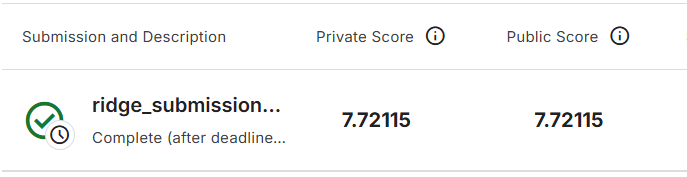

In [210]:
display(Image(filename="RIDGE.png"))

### Random Forest

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [213]:
%%time
model2.fit(train_inputs, train_targets)

Wall time: 2min 24s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [214]:
evaluate(model2)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(3.8832484896679365,
 4.252781436709175,
 array([ 5.22224622,  8.02707083,  8.47465953, ..., 11.91326783,
         6.66742328, 10.73328286]),
 array([7.98104852, 9.31405734, 8.68807573, ..., 6.62618553, 6.64052782,
        5.00413934]))

In [215]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.728715
1,2015-01-27 13:08:24.0000003,10.730089
2,2011-10-08 11:53:44.0000002,5.037395
3,2012-12-01 21:12:12.0000002,8.284759
4,2012-12-01 21:12:12.0000003,15.377509
...,...,...
9909,2015-05-10 12:37:51.0000002,9.014192
9910,2015-01-12 17:05:51.0000001,12.747668
9911,2015-04-19 20:44:15.0000001,54.954710
9912,2015-01-31 01:05:19.0000005,20.737179


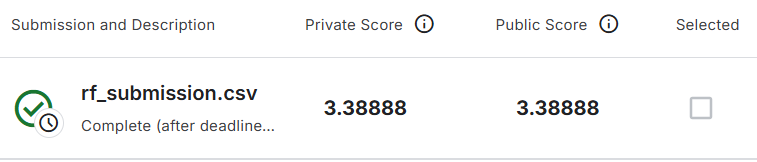

In [221]:
display(Image(filename="rf.png"))

### Gradient Boosting

In [216]:
from xgboost import XGBRegressor

In [217]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [218]:
%%time
model3.fit(train_inputs, train_targets)

Wall time: 7.02 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [219]:
evaluate(model3)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(3.5352154,
 4.104564,
 array([ 6.2235074,  6.922229 ,  7.5642767, ..., 11.731277 ,  5.986055 ,
         8.779146 ], dtype=float32),
 array([6.907884 , 9.253112 , 7.505055 , ..., 6.3196964, 6.7068825,
        4.760146 ], dtype=float32))

In [220]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.235343
1,2015-01-27 13:08:24.0000003,11.057154
2,2011-10-08 11:53:44.0000002,4.550879
3,2012-12-01 21:12:12.0000002,8.689993
4,2012-12-01 21:12:12.0000003,16.491484
...,...,...
9909,2015-05-10 12:37:51.0000002,8.420917
9910,2015-01-12 17:05:51.0000001,11.983174
9911,2015-04-19 20:44:15.0000001,51.905594
9912,2015-01-31 01:05:19.0000005,19.336723


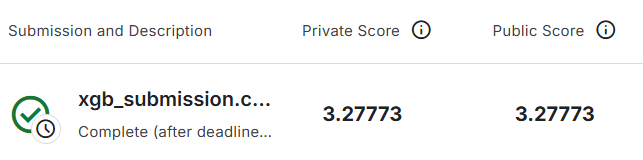

In [222]:
display(Image(filename="xgb.png"))

Getting 3.27 as public score is good, still we can do some more hyper-parameter tuning, Not now will learn more about it and come back.